# Importing Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Accessing Data and Preprocessing

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.drop(columns=['User ID', 'Gender'])
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Creating Plots for the given data

/tmp/ipykernel_811/3107948870.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


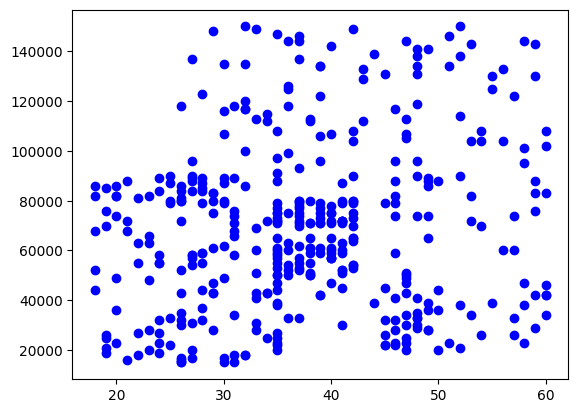

In [5]:
fig, ax = plt.subplots(1,1)
ax.scatter(df['Age'], df['EstimatedSalary'], color='blue')
fig.show()

/tmp/ipykernel_811/1338014213.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


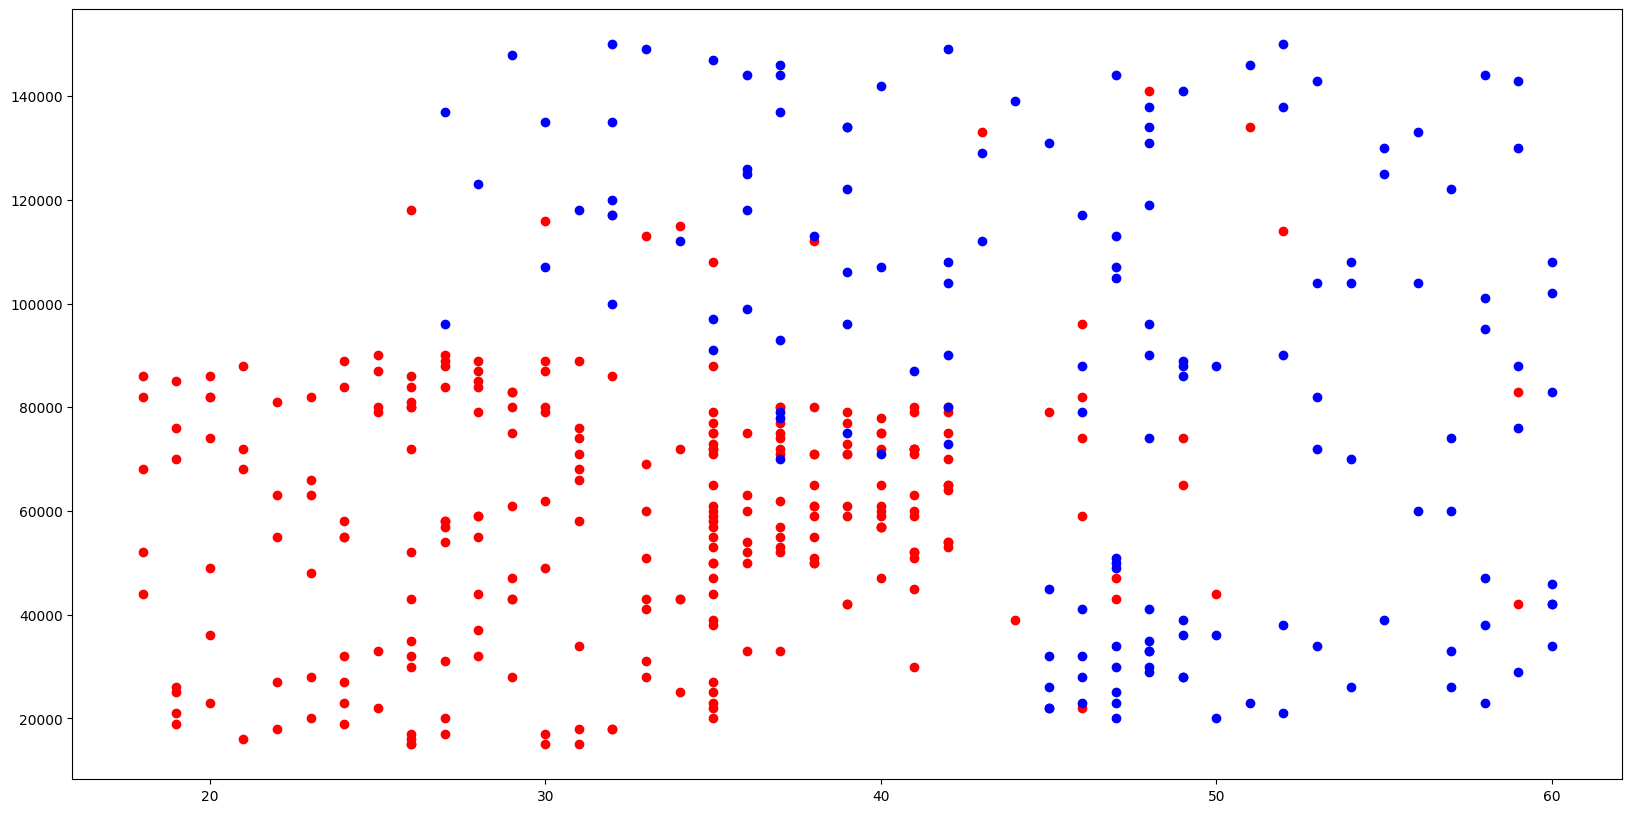

In [13]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.scatter(df.loc[df['Purchased'] == 0]['Age'], df.loc[df['Purchased'] == 0]['EstimatedSalary'], color='red')
ax.scatter(df.loc[df['Purchased'] == 1]['Age'], df.loc[df['Purchased'] == 1]['EstimatedSalary'], color='blue')
fig.show()

### The red points are the ads that were not purchased and the blue ones are the ads that were purchased

### This somewhat gives us an idea where our boundary line should be

### Currently I plan on making logistic regression for single variable

### So I will be removing another column

In [14]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [15]:
df = df.drop(columns='Age')
df.head()

,EstimatedSalary,Purchased
0,19000,0
1,20000,0
2,43000,0
3,57000,0
4,76000,0


/tmp/ipykernel_811/1344841328.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


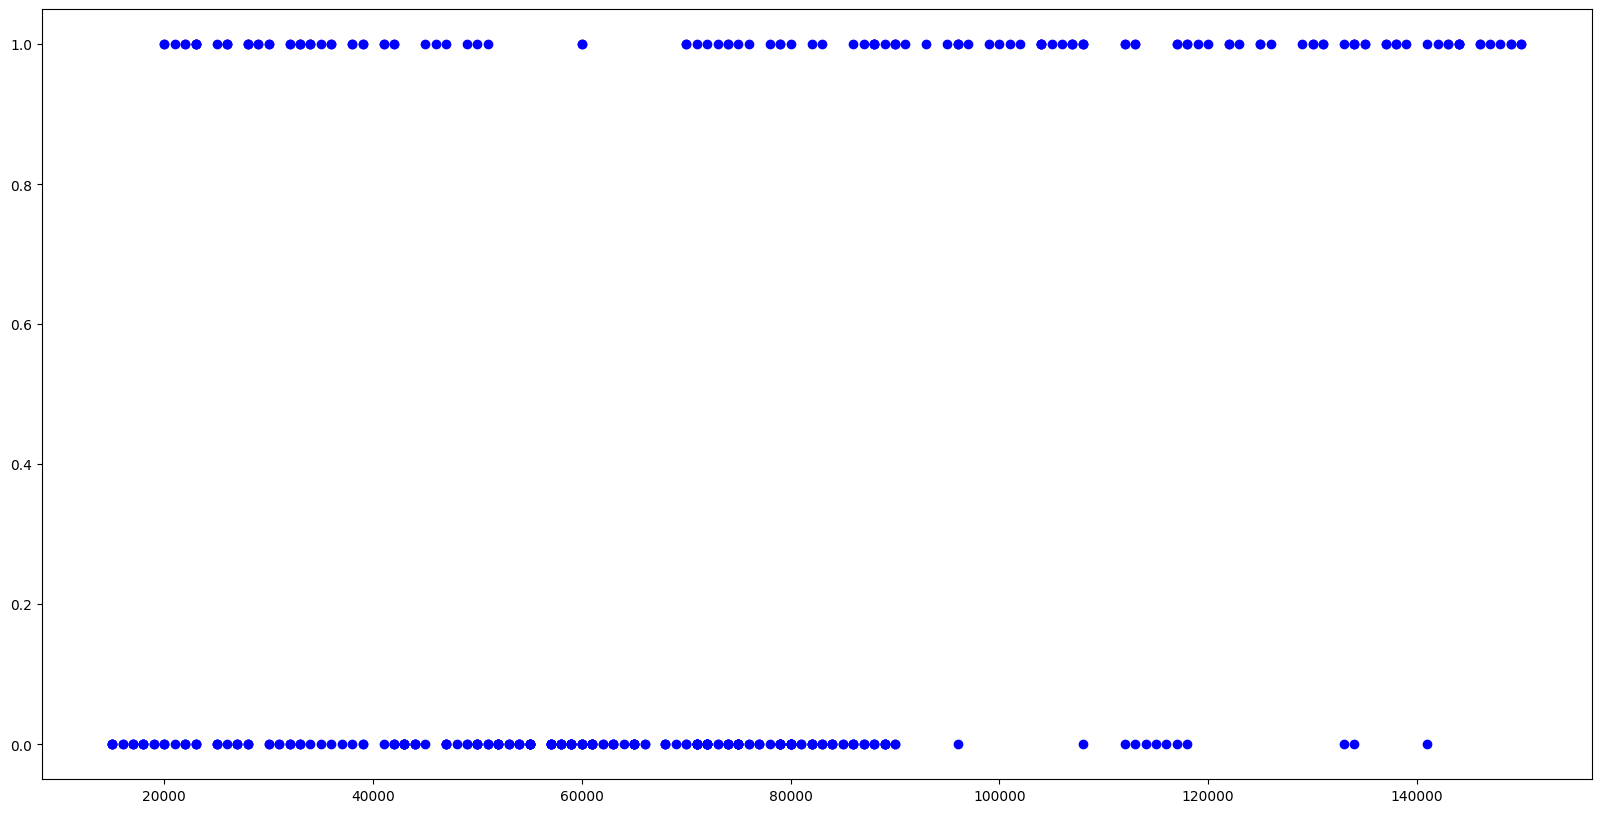

In [18]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))
ax.scatter(df['EstimatedSalary'], df['Purchased'], color='blue')
fig.show()

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate:float, epochs:int):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta_0 = 0
        self.theta_1 = 0
    
    def fit(self, features:pd.DataFrame, labels:pd.DataFrame):
        x = np.array(features)
        y = np.array(labels)

        for _ in range(self.epochs):
            z = self.theta_0 + (self.theta_1 * x)

            s = np.vectorize(squash)

            squashed = s(z)

            errors = squashed - y

            self.theta_0 = self.theta_0 - (self.learning_rate)*np.sum(errors)
            self.theta_1 = self.theta_1 - (self.learning_rate)*np.sum(errors*z)

    def squash(self, i):
        return(1/(1+(math.e**(-i))))

    def predict(self, x_test):
        x_test = np.array(x_test)
        z = self.theta_0 + (self.theta_1 * x_test)
        s = np.vectorize(squash)
        h = s(z)
        if(h >= 0.5):
            return(1)
        else:
            return(0)